In [88]:
# necessary imports
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from statsmodels.stats.anova import AnovaRM
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
from io import StringIO

# Load Data

In [106]:
P = {} # df per Participant
data_dir = "clean_data"
for csv_file in os.listdir(data_dir):
    if csv_file.startswith("P"): # Only get Participant Directories
        pn = int(csv_file[1:-4])
        tmp = pd.read_csv(os.path.join(data_dir,csv_file))
        tmp["participant"] = pn
        tmp = tmp[tmp["app_category"]!="LIBRARIES_AND_DEMO"]
        P[pn] = tmp.dropna()
df = pd.concat(P.values(), axis = 0)# all data

# Fixed Effects Models

KeyboardInterrupt: 

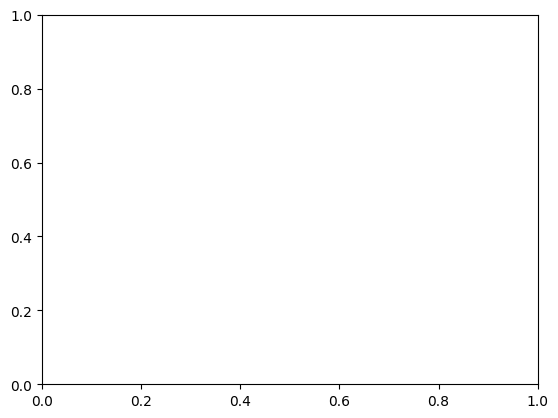

In [125]:
df["brightness"].describe()

In [127]:
models = {}
for emo_col in ["stress","valence","arousal","attention"]: # Loop over each dv
    dv = f"binary_{emo_col}"
    df[dv] = df[emo_col].apply(lambda x: 0 if x <=0 else 1) # Turn dependent variables into binary data
    #f"{dv} ~ C(app_category) * at_home + C(app_category) * brightness + at_home * brightness + C(participant)"
    #f"{dv} ~ C(app_category) * at_home + C(participant)" 
    formula = f"{dv} ~ C(app_category) * at_home + C(app_category) * brightness + at_home * brightness + C(participant)" # Define fixed effects model
    models[emo_col] = smf.logit(formula=formula, data=df).fit(maxiter=1000) # Run model

Optimization terminated successfully.
         Current function value: 0.500329
         Iterations 7
         Current function value: 0.533957
         Iterations: 1000


/Users/mauro/.pyenv/versions/3.10.6/envs/sandbox/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.524763
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.583492
         Iterations 8


In [91]:
results = {}
for var, res in models.items():
    html_string = res.summary().tables[1].as_html() # Extract the HTML from the model summary
    html_io = StringIO(html_string) # Use StringIO to wrap the HTML string
    results[var] = pd.read_html(html_io, header=0)[0] # Read the HTML into a DataFrame
    

### Summary table example

In [92]:
display(models["valence"].summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         binary_valence   No. Observations:               194491
Model:                          Logit   Df Residuals:                   194387
Method:                           MLE   Df Model:                          103
Date:                Tue, 11 Jun 2024   Pseudo R-squ.:                  0.2221
Time:                        09:56:26   Log-Likelihood:            -1.0425e+05
converged:                      False   LL-Null:                   -1.3401e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 1.8692      0.242      7.714      0.000       1.394       2.344
C(app_category)[T.COMICS]                                 0.1669      0.032      5.184      0.000       0.104       0.230
C(app_category)[T.GAME]                                   0.1174      0.039      2.998      0.003       0.041       0.194
C(app_category)[T.MUSIC_AND_AUDIO]                        0.0213      0.034      0.622      0.534      -0.046       0.089
C(app_category)[T.NEWS_AND_MAGAZINES]                    -0.4011      0.133     -3.007      0.003      -0.663      -0.140
C(app_category)[T.SHOPPING]                               0.1032      0.039      2.643      0.008       0.027       0.180
C(app_category)[T.SOCIAL]                                -0.0466      0.026     -1.764      0.078      -0.098       0.005
C(app_category)[T.SPORTS]                                -0.6032      0.085     -7.077      0.000      -0.770      -0.436
C(app_category)[T.VIDEO_PLAYERS]                         -0.0116      0.032     -0.359      0.720      -0.075       0.052
at_home[T.True]                                           0.4445      0.080      5.582      0.000       0.288       0.601
C(participant)[T.2]                                      -2.5071      0.260     -9.656      0.000      -3.016      -1.998
C(participant)[T.3]                                      -1.2372      0.256     -4.836      0.000      -1.739      -0.736
C(participant)[T.4]                                     -21.5913   2038.461     -0.011      0.992   -4016.902    3973.719
C(participant)[T.5]                                      -2.4131      0.248     -9.721      0.000      -2.900      -1.927
C(participant)[T.6]                                       1.2383      0.259      4.782      0.000       0.731       1.746
C(participant)[T.7]                                      -3.5574      0.243    -14.659      0.000      -4.033      -3.082
C(participant)[T.8]                                      -1.8780      0.245     -7.655      0.000      -2.359      -1.397
C(participant)[T.9]                                      -0.1073      0.246     -0.436      0.663      -0.589       0.375
C(participant)[T.10]                                     -0.8712      0.249     -3.502      0.000      -1.359      -0.384
C(participant)[T.11]                                     -2.1284      0.245     -8.687      0.000      -2.609      -1.648
C(participant)[T.12]                                     -1.7129      0.246     -6.970      0.000      -2.195      -1.231
C(participant)[T.13]                                     -1.0861      0.250     -4.352      0.000      -1.575      -0.597
C(participant)[T.14]                                     -0.5786      0.301     -1.921      0.055      -1.169       0.012
C(participant)[T.15]                                      0.6074     

## Stress model

### Full table

In [93]:
stress_df = results["stress"][~results["stress"]['Unnamed: 0'].str.contains('participant')]
stress_df

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,-1.959800,0.233000,-8.415,0.000,-2.416000,-1.503000
1,C(app_category)[T.COMICS],0.043500,0.031000,1.383,0.167,-0.018000,0.105000
2,C(app_category)[T.GAME],0.105800,0.038000,2.817,0.005,0.032000,0.179000
3,C(app_category)[T.MUSIC_AND_AUDIO],0.347900,0.032000,10.822,0.000,0.285000,0.411000
4,C(app_category)[T.NEWS_AND_MAGAZINES],0.901200,0.114000,7.879,0.000,0.677000,1.125000
5,C(app_category)[T.SHOPPING],0.033000,0.037000,0.880,0.379,-0.040000,0.106000
6,C(app_category)[T.SOCIAL],0.180000,0.026000,6.993,0.000,0.130000,0.230000
7,C(app_category)[T.SPORTS],0.219700,0.081000,2.713,0.007,0.061000,0.378000
8,C(app_category)[T.VIDEO_PLAYERS],0.208300,0.031000,6.634,0.000,0.147000,0.270000
9,at_home[T.True],0.159600,0.076000,2.100,0.036,0.011000,0.309000


### Filtering for signigicant effects only p < .05

In [94]:
stress_df[stress_df["P>|z|"] < .05]

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,-1.9598,0.233,-8.415,0.000,-2.41600,-1.503
2,C(app_category)[T.GAME],0.1058,0.038,2.817,0.005,0.03200,0.179
3,C(app_category)[T.MUSIC_AND_AUDIO],0.3479,0.032,10.822,0.000,0.28500,0.411
4,C(app_category)[T.NEWS_AND_MAGAZINES],0.9012,0.114,7.879,0.000,0.67700,1.125
6,C(app_category)[T.SOCIAL],0.1800,0.026,6.993,0.000,0.13000,0.230
7,C(app_category)[T.SPORTS],0.2197,0.081,2.713,0.007,0.06100,0.378
8,C(app_category)[T.VIDEO_PLAYERS],0.2083,0.031,6.634,0.000,0.14700,0.270
9,at_home[T.True],0.1596,0.076,2.100,0.036,0.01100,0.309
86,C(app_category)[T.COMICS]:at_home[T.True],-0.3616,0.168,-2.158,0.031,-0.69000,-0.033
88,C(app_category)[T.MUSIC_AND_AUDIO]:at_home[T.T...,-0.8754,0.142,-6.166,0.000,-1.15400,-0.597


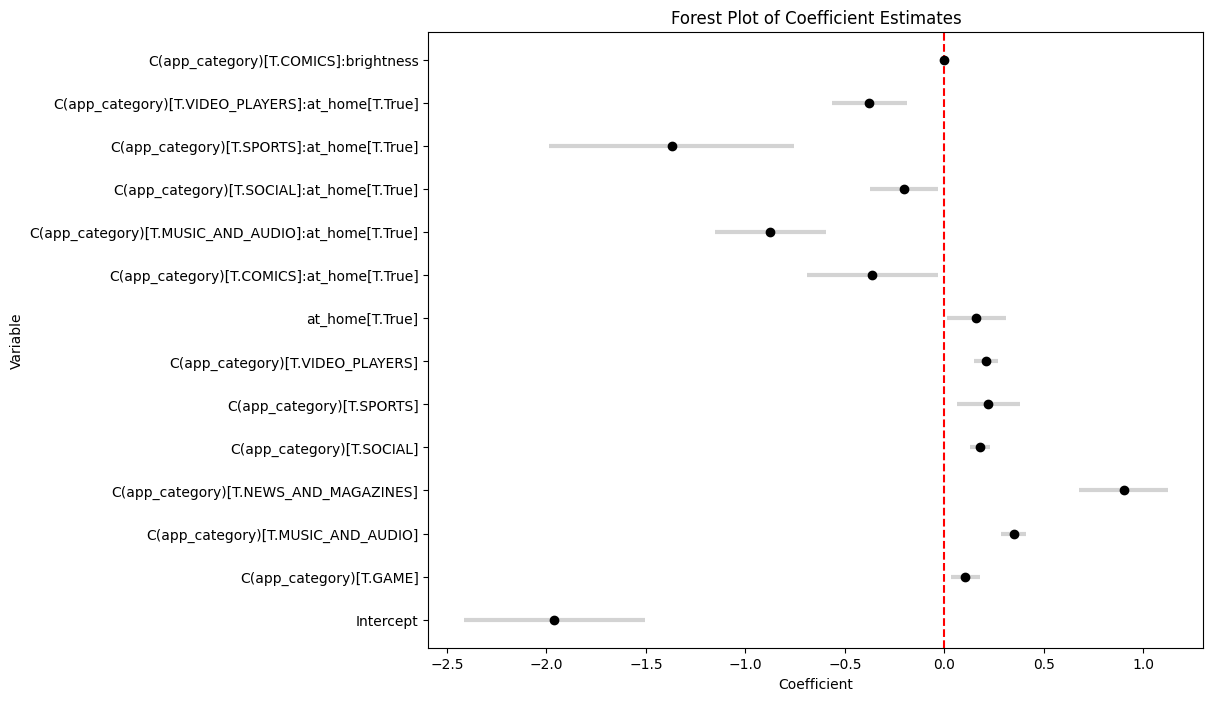

In [95]:
df = stress_df[stress_df["P>|z|"] < .05]
# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.errorbar(df["coef"], df["Unnamed: 0"], xerr=1.96*df["std err"], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

# Add vertical line at zero
ax.axvline(x=0, linestyle='--', color='red')

# Add labels and title
ax.set_xlabel('Coefficient')
ax.set_ylabel('Variable')
ax.set_title('Forest Plot of Coefficient Estimates')

# Show plot
plt.show()

## Valence model

### Full table

In [96]:
valence_df = results["valence"][~results["valence"]['Unnamed: 0'].str.contains('participant')]
valence_df

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,1.869200,0.242000,7.714,0.000,1.394000,2.344000
1,C(app_category)[T.COMICS],0.166900,0.032000,5.184,0.000,0.104000,0.230000
2,C(app_category)[T.GAME],0.117400,0.039000,2.998,0.003,0.041000,0.194000
3,C(app_category)[T.MUSIC_AND_AUDIO],0.021300,0.034000,0.622,0.534,-0.046000,0.089000
4,C(app_category)[T.NEWS_AND_MAGAZINES],-0.401100,0.133000,-3.007,0.003,-0.663000,-0.140000
5,C(app_category)[T.SHOPPING],0.103200,0.039000,2.643,0.008,0.027000,0.180000
6,C(app_category)[T.SOCIAL],-0.046600,0.026000,-1.764,0.078,-0.098000,0.005000
7,C(app_category)[T.SPORTS],-0.603200,0.085000,-7.077,0.000,-0.770000,-0.436000
8,C(app_category)[T.VIDEO_PLAYERS],-0.011600,0.032000,-0.359,0.720,-0.075000,0.052000
9,at_home[T.True],0.444500,0.080000,5.582,0.000,0.288000,0.601000


### Filtering for signigicant effects only p < .05

In [97]:
valence_df[valence_df["P>|z|"] < .05]

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,1.869200,0.242000,7.714,0.000,1.394000,2.344000
1,C(app_category)[T.COMICS],0.166900,0.032000,5.184,0.000,0.104000,0.230000
2,C(app_category)[T.GAME],0.117400,0.039000,2.998,0.003,0.041000,0.194000
4,C(app_category)[T.NEWS_AND_MAGAZINES],-0.401100,0.133000,-3.007,0.003,-0.663000,-0.140000
5,C(app_category)[T.SHOPPING],0.103200,0.039000,2.643,0.008,0.027000,0.180000
7,C(app_category)[T.SPORTS],-0.603200,0.085000,-7.077,0.000,-0.770000,-0.436000
9,at_home[T.True],0.444500,0.080000,5.582,0.000,0.288000,0.601000
87,C(app_category)[T.GAME]:at_home[T.True],-0.537400,0.130000,-4.147,0.000,-0.791000,-0.283000
89,C(app_category)[T.NEWS_AND_MAGAZINES]:at_home[...,-0.948300,0.367000,-2.587,0.010,-1.667000,-0.230000
90,C(app_category)[T.SHOPPING]:at_home[T.True],-0.791800,0.162000,-4.895,0.000,-1.109000,-0.475000


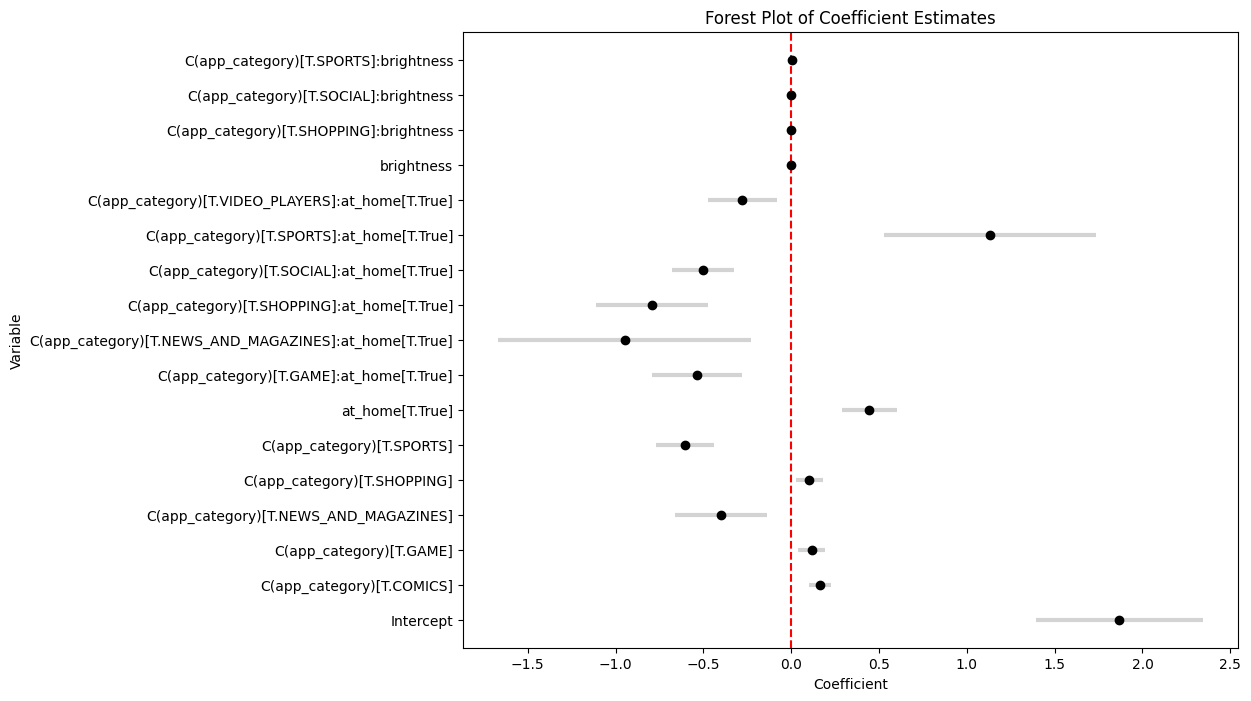

In [98]:
df = valence_df[valence_df["P>|z|"] < .05]
# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.errorbar(df["coef"], df["Unnamed: 0"], xerr=1.96*df["std err"], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

# Add vertical line at zero
ax.axvline(x=0, linestyle='--', color='red')

# Add labels and title
ax.set_xlabel('Coefficient')
ax.set_ylabel('Variable')
ax.set_title('Forest Plot of Coefficient Estimates')

# Show plot
plt.show()

## Arousal model

### Full table

In [99]:
arousal_df = results["arousal"][~results["arousal"]['Unnamed: 0'].str.contains('participant')]
arousal_df

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,0.589600,0.173000,3.406,0.001,0.250000,0.929000
1,C(app_category)[T.COMICS],0.210500,0.032000,6.501,0.000,0.147000,0.274000
2,C(app_category)[T.GAME],0.159100,0.038000,4.234,0.000,0.085000,0.233000
3,C(app_category)[T.MUSIC_AND_AUDIO],-0.111400,0.033000,-3.333,0.001,-0.177000,-0.046000
4,C(app_category)[T.NEWS_AND_MAGAZINES],-0.363200,0.115000,-3.151,0.002,-0.589000,-0.137000
5,C(app_category)[T.SHOPPING],-0.317500,0.039000,-8.127,0.000,-0.394000,-0.241000
6,C(app_category)[T.SOCIAL],0.024400,0.027000,0.908,0.364,-0.028000,0.077000
7,C(app_category)[T.SPORTS],-0.306800,0.079000,-3.863,0.000,-0.462000,-0.151000
8,C(app_category)[T.VIDEO_PLAYERS],-0.000300,0.032000,-0.008,0.993,-0.064000,0.063000
9,at_home[T.True],0.453800,0.078000,5.790,0.000,0.300000,0.607000


### Filtering for signigicant effects only p < .05

In [100]:
arousal_df[arousal_df["P>|z|"] < .05]

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,0.589600,0.173000,3.406,0.001,0.250000,0.929000
1,C(app_category)[T.COMICS],0.210500,0.032000,6.501,0.000,0.147000,0.274000
2,C(app_category)[T.GAME],0.159100,0.038000,4.234,0.000,0.085000,0.233000
3,C(app_category)[T.MUSIC_AND_AUDIO],-0.111400,0.033000,-3.333,0.001,-0.177000,-0.046000
4,C(app_category)[T.NEWS_AND_MAGAZINES],-0.363200,0.115000,-3.151,0.002,-0.589000,-0.137000
5,C(app_category)[T.SHOPPING],-0.317500,0.039000,-8.127,0.000,-0.394000,-0.241000
7,C(app_category)[T.SPORTS],-0.306800,0.079000,-3.863,0.000,-0.462000,-0.151000
9,at_home[T.True],0.453800,0.078000,5.790,0.000,0.300000,0.607000
86,C(app_category)[T.COMICS]:at_home[T.True],-0.770100,0.172000,-4.473,0.000,-1.107000,-0.433000
87,C(app_category)[T.GAME]:at_home[T.True],-0.720000,0.133000,-5.413,0.000,-0.981000,-0.459000


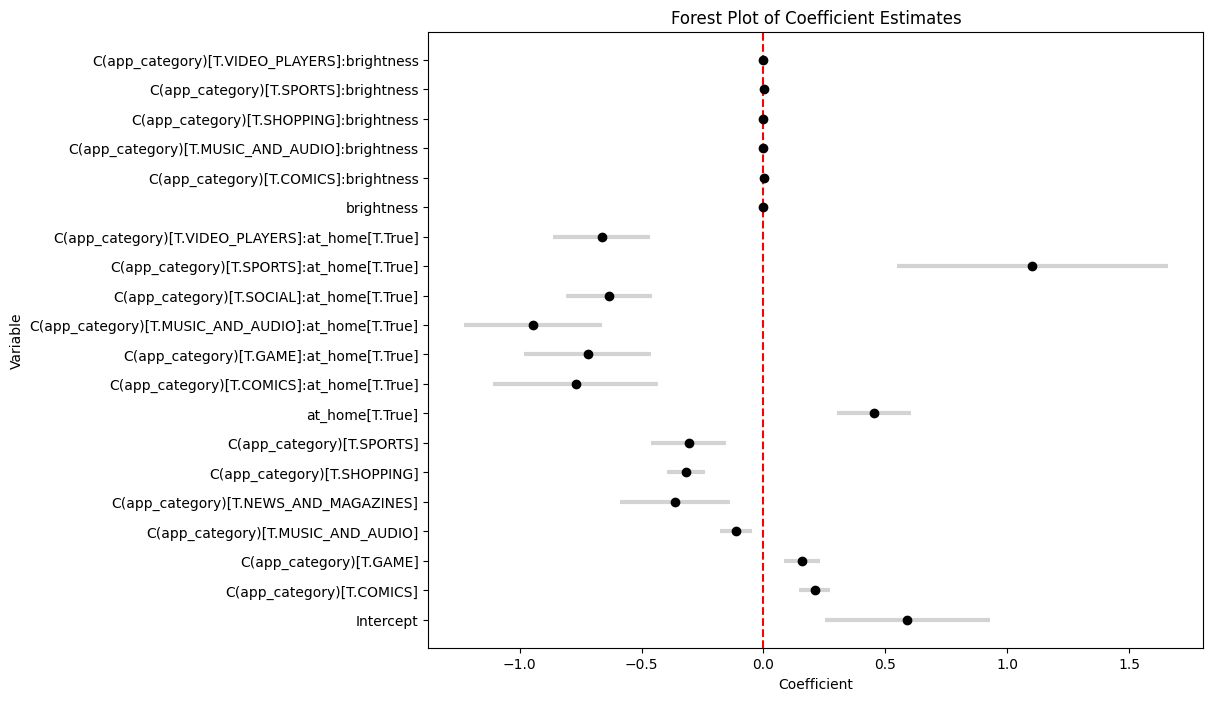

In [101]:
df = arousal_df[arousal_df["P>|z|"] < .05]
# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.errorbar(df["coef"], df["Unnamed: 0"], xerr=1.96*df["std err"], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

# Add vertical line at zero
ax.axvline(x=0, linestyle='--', color='red')

# Add labels and title
ax.set_xlabel('Coefficient')
ax.set_ylabel('Variable')
ax.set_title('Forest Plot of Coefficient Estimates')

# Show plot
plt.show()

## Attention model

### Full table

In [102]:
attention_df = results["attention"][~results["attention"]['Unnamed: 0'].str.contains('participant')]
attention_df

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,1.5665,0.218000,7.197,0.000,1.140000,1.993000
1,C(app_category)[T.COMICS],0.1737,0.030000,5.810,0.000,0.115000,0.232000
2,C(app_category)[T.GAME],-0.0520,0.035000,-1.504,0.133,-0.120000,0.016000
3,C(app_category)[T.MUSIC_AND_AUDIO],0.0247,0.031000,0.800,0.423,-0.036000,0.085000
4,C(app_category)[T.NEWS_AND_MAGAZINES],-0.2454,0.118000,-2.073,0.038,-0.477000,-0.013000
5,C(app_category)[T.SHOPPING],-0.0167,0.036000,-0.466,0.641,-0.087000,0.053000
6,C(app_category)[T.SOCIAL],0.0907,0.023000,3.862,0.000,0.045000,0.137000
7,C(app_category)[T.SPORTS],-0.2116,0.072000,-2.942,0.003,-0.353000,-0.071000
8,C(app_category)[T.VIDEO_PLAYERS],0.0123,0.030000,0.413,0.680,-0.046000,0.071000
9,at_home[T.True],0.0303,0.073000,0.414,0.679,-0.113000,0.174000


### Filtering for signigicant effects only p < .05

In [103]:
attention_df[attention_df["P>|z|"] < .05]

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,1.5665,0.218000,7.197,0.000,1.140000,1.993000
1,C(app_category)[T.COMICS],0.1737,0.030000,5.810,0.000,0.115000,0.232000
4,C(app_category)[T.NEWS_AND_MAGAZINES],-0.2454,0.118000,-2.073,0.038,-0.477000,-0.013000
6,C(app_category)[T.SOCIAL],0.0907,0.023000,3.862,0.000,0.045000,0.137000
7,C(app_category)[T.SPORTS],-0.2116,0.072000,-2.942,0.003,-0.353000,-0.071000
87,C(app_category)[T.GAME]:at_home[T.True],-0.5049,0.125000,-4.051,0.000,-0.749000,-0.261000
88,C(app_category)[T.MUSIC_AND_AUDIO]:at_home[T.T...,0.5113,0.130000,3.922,0.000,0.256000,0.767000
90,C(app_category)[T.SHOPPING]:at_home[T.True],0.3867,0.151000,2.560,0.010,0.091000,0.683000
92,C(app_category)[T.SPORTS]:at_home[T.True],1.7239,0.408000,4.228,0.000,0.925000,2.523000
94,brightness,0.0002,0.000030,5.272,0.000,0.000000,0.000000


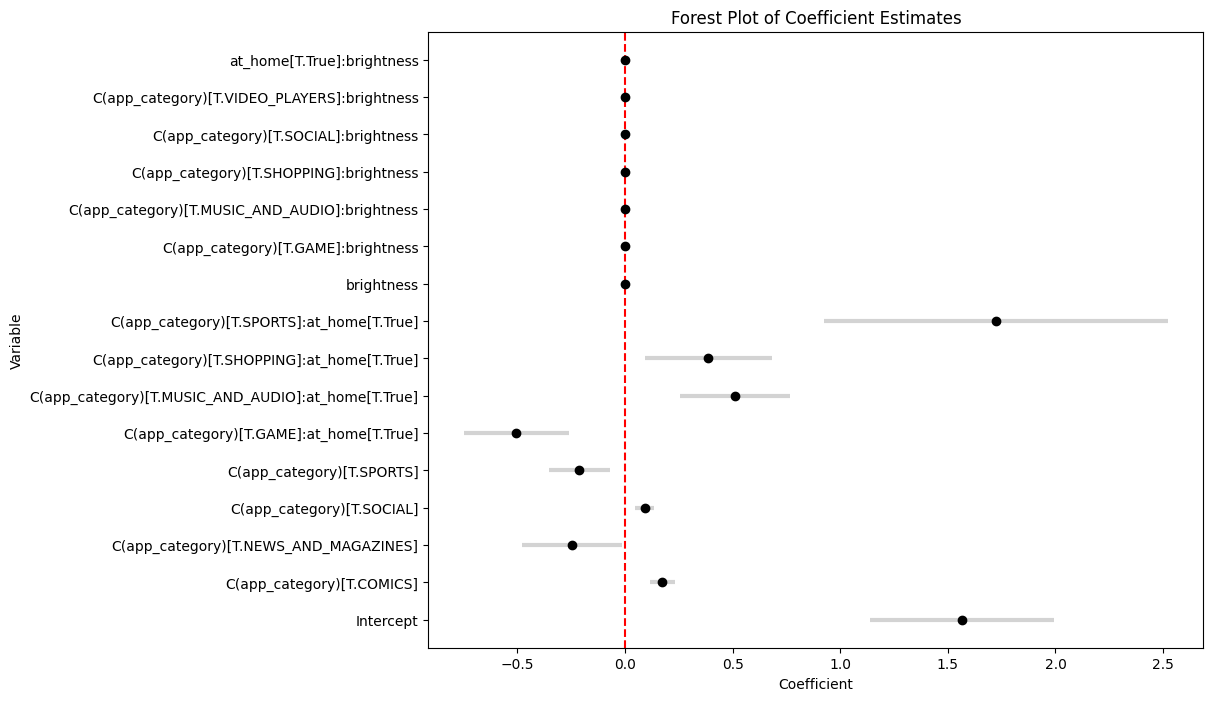

In [104]:
df = attention_df[attention_df["P>|z|"] < .05]
# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.errorbar(df["coef"], df["Unnamed: 0"], xerr=1.96*df["std err"], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

# Add vertical line at zero
ax.axvline(x=0, linestyle='--', color='red')

# Add labels and title
ax.set_xlabel('Coefficient')
ax.set_ylabel('Variable')
ax.set_title('Forest Plot of Coefficient Estimates')

# Show plot
plt.show()